<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Codenation/blob/master/Codenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio AceleraDS Codenation

Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

## Detalhes

Tópicos

Neste desafio você aprenderá:

- Lógica
- Análise de dados
- Estatística
- Regression

Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação. Determine os 20 melhores colocados, por ordem, para os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

Faça o upload do arquivo answer.csv usando o botão "Submeter resposta".

Observações

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.

## Importando dados e Bibliotecas

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import pandas as pd

df = pd.read_csv("/content/train.csv")
teste = pd.read_csv("/content/test.csv")

In [49]:
print(df.shape, teste.shape)

(13730, 167) (4576, 47)


In [57]:
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


## Nota final

In [3]:
df['notafinal'] = ((df['NU_NOTA_CN']*2) + (df['NU_NOTA_CH']*1) + 
                   (df['NU_NOTA_LC']*1.5) + (df['NU_NOTA_MT']*3) + 
                   (df['NU_NOTA_REDACAO']*3))/10.5
df[['NU_INSCRICAO', 'notafinal']].sort_values(by = 'notafinal', ascending = False).head(20)

,NU_INSCRICAO,notafinal
10801,848daf808904864c1ee5d51545a2539e2dcbe901,834.147619
3226,97166da67df0908861a868cf318b277c4bdbb0da,828.214286
3682,b733ccac4e5b7c1da0448f1dad7990ec0793b1d2,819.514286
9011,78ca18b6fea7ccd3e067b3945cf200f8686209a7,817.333333
4755,8588b01c2ff81ad3c9ff31cd89fc094896c4aa69,813.671429
12707,19982f867b8f23a829a2f738374770708ec7f263,809.938095
6039,17ae668ce9041105883e9db101d614f58d526f66,808.847619
10219,3326c76719930f9838bc9ef803fe1b73a1668723,804.304762
1509,41489fd85a5d0cb6e397fb5ebcd19d32e9265cb7,802.833333
3535,32767c1a152919a1f72fa91afe19bb7c559f2824,800.752381


## Limpeza e Preparação

In [59]:
teste.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [0]:
nu_insricao = teste['NU_INSCRICAO']

In [0]:
teste.drop(['NU_INSCRICAO', 'CO_PROVA_CN', 'CO_PROVA_CH', 
            'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_UF_RESIDENCIA',
            'TP_NACIONALIDADE', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC'],
            axis=1, inplace=True)

In [6]:
teste.loc[teste['TP_SEXO'] == 'F', 'TP_SEXO'] = 1
teste.loc[teste['TP_SEXO'] == 'M', 'TP_SEXO'] = 0

df.loc[df['TP_SEXO'] == 'F', 'TP_SEXO'] = 1
df.loc[df['TP_SEXO'] == 'M', 'TP_SEXO'] = 0

pd.unique(teste['TP_SEXO'])

array([1, 0], dtype=object)

In [63]:
teste.dtypes

SG_UF_RESIDENCIA      object
NU_IDADE               int64
TP_SEXO               object
TP_COR_RACA            int64
TP_ST_CONCLUSAO        int64
TP_ANO_CONCLUIU        int64
TP_ESCOLA              int64
IN_TREINEIRO           int64
IN_BAIXA_VISAO         int64
IN_CEGUEIRA            int64
IN_SURDEZ              int64
IN_DISLEXIA            int64
IN_DISCALCULIA         int64
IN_SABATISTA           int64
IN_GESTANTE            int64
IN_IDOSO               int64
TP_PRESENCA_CN         int64
TP_PRESENCA_CH         int64
TP_PRESENCA_LC         int64
NU_NOTA_CN           float64
NU_NOTA_CH           float64
NU_NOTA_LC           float64
TP_LINGUA              int64
TP_STATUS_REDACAO    float64
NU_NOTA_COMP1        float64
NU_NOTA_COMP2        float64
NU_NOTA_COMP3        float64
NU_NOTA_COMP4        float64
NU_NOTA_COMP5        float64
NU_NOTA_REDACAO      float64
Q001                  object
Q002                  object
Q006                  object
Q024                  object
Q025          

In [0]:
# df.groupby(by=['TP_COR_RACA', 'TP_SEXO'])['NU_NOTA_MT'].describe() # O quão anti-ético é isso?!
# df.groupby(by=['TP_NACIONALIDADE'])['NU_NOTA_MT'].describe() # Não é relevante

In [64]:
print(df.shape, teste.shape)

(13730, 168) (4576, 38)


In [7]:
nota_mt = df['NU_NOTA_MT']
nota_mt

0        399.4
1        459.8
2          NaN
3          NaN
4          NaN
         ...  
13725    403.2
13726    452.4
13727    398.0
13728    386.6
13729    428.9
Name: NU_NOTA_MT, Length: 13730, dtype: float64

In [8]:
df = df[teste.columns]
df = df.join(nota_mt)
df

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,RS,24,0,1,1,4,1,0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,CE,17,1,3,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,CE,21,1,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,RJ,25,1,0,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,AM,28,0,2,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,SP,20,0,1,1,3,1,0,0,0,0,0,0,0,0,0,1,1,1,438.2,419.7,394.5,0,1.0,120.0,120.0,80.0,80.0,40.0,440.0,E,E,G,B,B,B,C,A,403.2
13726,PE,33,1,3,1,10,1,0,0,0,0,0,0,0,0,0,1,1,1,423.8,557.9,533.0,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,A,A,C,A,B,B,I,A,452.4
13727,RS,15,1,1,3,0,1,1,0,0,0,0,0,0,0,0,1,1,1,460.5,528.9,569.3,0,1.0,120.0,120.0,120.0,120.0,120.0,600.0,C,G,B,A,B,A,NaN,A,398.0
13728,RJ,36,0,3,4,0,1,0,0,0,0,0,0,0,0,0,1,1,1,422.5,621.7,569.0,1,1.0,100.0,100.0,80.0,80.0,100.0,460.0,B,D,G,B,B,C,E,A,386.6


In [0]:
df.fillna(df.median(), inplace=True)
df2 = pd.get_dummies(df)

In [10]:
teste.fillna(teste.median(), inplace=True)
teste2 = pd.get_dummies(teste)
teste2

,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,...,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q027_A,Q027_B,Q027_C,Q027_D,Q027_E,Q027_F,Q027_G,Q027_H,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,22,1,3,1,5,1,0,0,0,0,0,0,0,0,0,1,1,1,464.80,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,26,1,3,1,8,1,0,0,0,0,0,0,0,0,0,1,1,1,391.10,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,21,0,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,595.90,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,27,1,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,458.25,532.0,516.8,0,1.0,120.0,120.0,100.0,120.0,80.0,540.0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,18,0,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,592.90,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,17,1,1,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,398.30,558.2,511.6,0,1.0,120.0,120.0,120.0,100.0,40.0,500.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4572,17,0,2,2,0,2,0,0,0,0,0,0,0,0,0,1,1,1,427.60,579.7,471.1,1,1.0,100.0,100.0,100.0,120.0,100.0,520.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4573,19,0,1,1,2,1,0,0,0,0,0,0,0,0,0,1,1,1,639.20,643.8,604.9,0,1.0,160.0,140.0,120.0,140.0,80.0,640.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4574,17,0,2,3,0,1,1,0,0,0,0,0,0,0,0,1,1,1,427.10,467.9,540.2,1,1.0,140.0,80.0,80.0,140.0,80.0,520.0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
print(df2.shape, teste2.shape)

(13730, 118) (4576, 117)


## Feature Selection

In [0]:
y = df2['NU_NOTA_MT']
X = df2.drop('NU_NOTA_MT', axis=1)

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=0.7, random_state=0)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((9611, 117), (4119, 117), (9611,), (4119,))

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

k_vs_score = []

for k in range(2,107,4):
  selector = SelectKBest(score_func=f_regression, k=k)

  Xtrain2 = selector.fit_transform(Xtrain, ytrain)
  Xval2 = selector.transform(Xval)

  mdl = GradientBoostingRegressor(random_state=0)
  mdl.fit(Xtrain2, ytrain)

  p = mdl.predict(Xval2)

  score = mean_squared_error(yval, p)
  print("k = {} - MSE = {}".format(k, score))

  k_vs_score.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 2 - MSE = 4330.994818981598


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 6 - MSE = 4226.890435405266


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 10 - MSE = 4198.564790902759


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 14 - MSE = 4201.558322903231


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 18 - MSE = 4185.455175643052


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 22 - MSE = 4191.176699397448


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 26 - MSE = 4038.3728423467187


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 30 - MSE = 4029.847238049803


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 34 - MSE = 4011.9966731003537


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 38 - MSE = 4011.4111824130982


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 42 - MSE = 4015.4200069054896


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 46 - MSE = 4005.1824733964418


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 50 - MSE = 4003.5261927978827


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 54 - MSE = 4005.462854043239


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 58 - MSE = 4000.3476411681963


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 62 - MSE = 4001.8499827391856


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 66 - MSE = 4002.774119226587


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 70 - MSE = 4008.044843106554


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 74 - MSE = 4007.971447215282


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 78 - MSE = 3999.9662969582764


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 82 - MSE = 4009.5638575215653


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 86 - MSE = 4010.6124641226534


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 90 - MSE = 4008.9244390477397


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 94 - MSE = 4015.8775269050193


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 98 - MSE = 4014.6426629027987


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 102 - MSE = 4012.5225596658597


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


k = 106 - MSE = 4013.638409385865


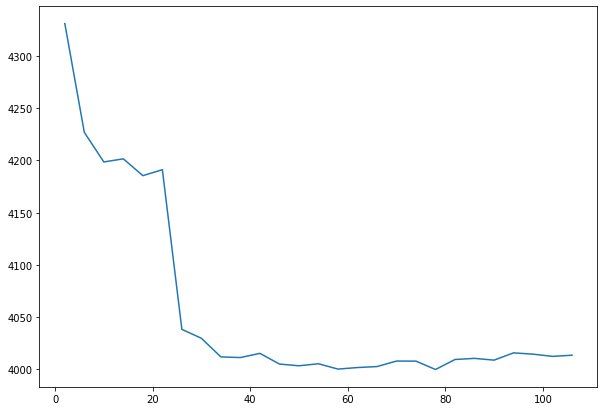

In [14]:
pd.Series(k_vs_score, index=range(2,107,4)).plot(figsize=(10,7))

In [19]:
selector = SelectKBest(score_func=f_regression, k=58)
selector.fit(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=58, score_func=<function f_regression at 0x7f0c451fb620>)

In [20]:
mask = selector.get_support()
Xval.columns[mask]

Index(['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'SG_UF_RESIDENCIA_CE',
       'SG_UF_RESIDENCIA_MG', 'SG_UF_RESIDENCIA_SP', 'Q001_A', 'Q001_B',
       'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H', 'Q002_A', 'Q002_B', 'Q002_C',
       'Q002_E', 'Q002_F', 'Q002_G', 'Q006_A', 'Q006_B', 'Q006_C', 'Q006_G',
       'Q006_H', 'Q006_I', 'Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N',
       'Q006_O', 'Q006_P', 'Q006_Q', 'Q024_A', 'Q024_B', 'Q024_C', 'Q024_D',
       'Q024_E', 'Q025_A', 'Q025_B', 'Q047_A', 'Q047_D', 'Q047_E'],
      dtype='object')

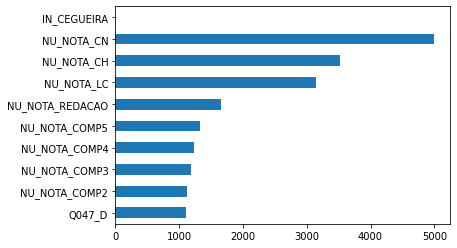

In [21]:
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().tail(10).plot.barh()

In [96]:
print(df.groupby(by='IN_CEGUEIRA')['NU_NOTA_MT'].mean())
print(pd.unique(df['IN_CEGUEIRA '])) 
#Nenhum cego fez a prova e mesmo assim tenho no seletor ¯\_(ツ)_/¯

IN_CEGUEIRA
0    476.918274
Name: NU_NOTA_MT, dtype: float64
[0]


In [28]:
Xk = df2[Xval.columns[mask]]
yk = df['NU_NOTA_MT']

Xtraink, Xvalk, ytraink, yvalk = train_test_split(Xk, yk, train_size=0.7, random_state=0)


mdlk = GradientBoostingRegressor(random_state=0)
mdlk.fit(Xtraink, ytraink)
pk = mdlk.predict(Xvalk)
scorek = mean_squared_error(yvalk, pk)
scorek # 58 features e 4k é o resultado --'

4000.3476411681963

In [29]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 2.3MB/s 


In [30]:
from skopt import gp_minimize

def tunar_modelo(params):
  learning_rate = params[0]
  n_estimators = params[1]
  min_samples_split = params[2]
  min_samples_leaf = params[3]

  print(params,'\n')
  mdlk = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators,
                                         min_samples_split = min_samples_split.astype(int), 
                                         min_samples_leaf = min_samples_leaf.astype(int), 
                                         random_state = 0)
  mdlk.fit(Xtraink, ytraink)
  pk = mdlk.predict(Xvalk)
  return mean_squared_error(yvalk, pk)

space = [(1e-2, 1e-1), # learning_rate
         (1, 1000), # n_estimators
         (2, 100), # min_samples_split
         (1, 100)] # min_samples_leaf, # subsample, # max_features

resultado_gp = gp_minimize(tunar_modelo, space, random_state=0, n_calls=200, n_random_starts=10, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
[0.06335601564025166, 844, 86, 85] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 18.3125
Function value obtained: 4049.9588
Current minimum: 4049.9588
Iteration No: 2 started. Evaluating function at random point.
[0.06612073271073753, 385, 31, 7] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 8.4069
Function value obtained: 4012.3562
Current minimum: 4012.3562
Iteration No: 3 started. Evaluating function at random point.
[0.0345390665122102, 478, 82, 49] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 10.4365
Function value obtained: 4045.9616
Current minimum: 4012.3562
Iteration No: 4 started. Evaluating function at random point.
[0.04535063164907469, 836, 35, 65] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 18.1160
Function value obtained: 4066.6448
Current minimum: 4012.3562
Iteration No: 5 started. Evaluating function at random 

In [31]:
resultado_gp.x # 3975.8216

[0.024433426081955516, 447, 79, 1]

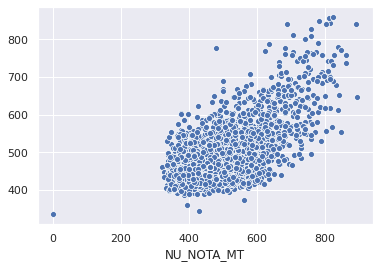

In [77]:
import seaborn as sns
sns.set()

sns.scatterplot(x=yval, y=p)

## OI?

In [0]:
import numpy as np

features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

df2['MEDIAN']  = df2[features].apply(np.median, axis=1)
df2['MIN']     = df2[features].apply(np.min, axis=1)
df2['MAX']     = df2[features].apply(np.max, axis=1)
df2['AVERAGE'] = df2[features].apply(np.average, axis=1)
df2['STD']     = df2[features].apply(np.std, axis=1)

teste2['MEDIAN']  = teste2[features].apply(np.median, axis=1)
teste2['MIN']     = teste2[features].apply(np.min, axis=1)
teste2['MAX']     = teste2[features].apply(np.max, axis=1)
teste2['AVERAGE'] = teste2[features].apply(np.average, axis=1)
teste2['STD']     = teste2[features].apply(np.std, axis=1)

In [104]:
df2  = df2.replace(0, np.NaN).dropna(how='all').fillna(0)
teste2   = teste2.replace(0, np.NaN).dropna(how='all').fillna(0)

df2.shape, teste2.shape

((13730, 123), (4576, 122))

In [105]:
df2_zeronan       = df2[features].replace(0, np.NaN)
df2['NZ_MEDIAN']  = df2_zeronan[features].apply(np.nanmedian, axis=1)
df2['NZ_MIN']     = df2_zeronan[features].apply(np.nanmin, axis=1)
df2['NZ_AVERAGE'] = df2_zeronan[features].apply(np.nanmean, axis=1)
df2['NZ_STD']     = df2_zeronan[features].apply(np.nanstd, axis=1)

teste2_zeronan       = teste2[features].replace(0, np.NaN)
teste2['NZ_MEDIAN']  = teste2_zeronan[features].apply(np.nanmedian, axis=1)
teste2['NZ_MIN']     = teste2_zeronan[features].apply(np.nanmin, axis=1)
teste2['NZ_AVERAGE'] = teste2_zeronan[features].apply(np.nanmean, axis=1)
teste2['NZ_STD']     = teste2_zeronan[features].apply(np.nanstd, axis=1)

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/usr/local/lib/python3.6/dist-packages/pandas/core/apply.py:296: RuntimeWarning: All-NaN axis encountered
  values, self.f, axis=self.axis, dummy=dummy, labels=labels
/usr/local/lib/python3.6/dist-packages/pandas/core/apply.py:296: RuntimeWarning: Mean of empty slice
  values, self.f, axis=self.axis, dummy=dummy, labels=labels
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [0]:
coluna_features = features + ['MEDIAN', 'MIN', 'MAX', 'AVERAGE', 'STD']

In [0]:
X2 = df2[coluna_features]
y2 = df2['NU_NOTA_MT']

In [112]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X2, y2, train_size=0.7, random_state=0)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((9611, 9), (4119, 9), (9611,), (4119,))

In [113]:
from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(Xtrain, ytrain)
p = mdl.predict(Xval)
score = mean_squared_error(yval, p)
score

4600.8711032449

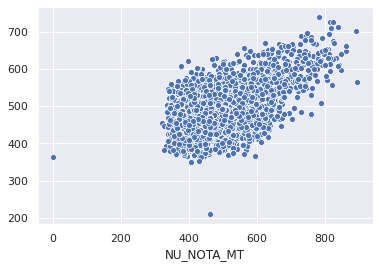

In [114]:
sns.scatterplot(yval,p)

In [115]:
mdl2 = GradientBoostingRegressor(random_state=0)
mdl2.fit(Xtrain, ytrain)
p2 = mdl2.predict(Xval)
s2 = mean_squared_error(yval, p)
s # oi?!

4005.138547820231

In [116]:
Xtrain

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,MEDIAN,MIN,MAX,AVERAGE,STD
10152,389.6,441.0,500.0,460.0,450.50,389.6,500.0,447.650,39.708532
13559,499.5,586.5,564.1,520.0,542.05,499.5,586.5,542.525,34.488431
7054,459.8,532.0,520.9,540.0,526.45,459.8,540.0,513.175,31.553635
244,459.8,532.0,520.9,540.0,526.45,459.8,540.0,513.175,31.553635
11684,393.3,474.0,552.1,560.0,513.05,393.3,560.0,494.850,67.581821
...,...,...,...,...,...,...,...,...,...
13123,440.8,559.2,546.2,680.0,552.70,440.8,680.0,556.550,84.782236
3264,454.9,521.7,442.9,360.0,448.90,360.0,521.7,444.875,57.467920
9845,485.7,598.5,516.5,540.0,528.25,485.7,598.5,535.175,41.321506
10799,459.8,532.0,520.9,540.0,526.45,459.8,540.0,513.175,31.553635
